<a href="https://colab.research.google.com/github/roshan-shaik-ml/langchain-academy/blob/main/Lesson_2_Edges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edges Control Flow

1. **Edges** - (Static Edges)
    - Serial
    - Parallel
2. **Conditional Edges** (Dynamic Edges)
    - Conditional Edges
    - Map-Reduce



**Reducers Function** - Used to handle multiple output of the parallel nodes at the same level. We can create a custom reducer.

In [2]:
!pip install -q langgraph langchain

In [5]:
from IPython.display import Image, display
import operator
from typing import Annotated, List, Literal, TypedDict
from langgraph.graph import END, START, StateGraph
from langgraph.types import Command, interrupt

In [6]:
class State(TypedDict):

    nlist : Annotated[List[str], operator.add] # add is the reducer function

In [8]:
def node_a(state: State) -> State:
    print(f"Adding 'A' to {state['nlist']}")
    return (State(nlist = ['A']))

def node_b(state: State) -> State:
    print(f"Adding 'B' to {state['nlist']}")
    return (State(nlist = ['B']))


def node_c(state: State) -> State:
    print(f"Adding 'C' to {state['nlist']}")
    return (State(nlist = ['C']))

def node_bb(state: State) -> State:
    print(f"Adding 'BB' to {state['nlist']}")
    return (State(nlist = ['BB']))

def node_cc(state: State) -> State:
    print(f"Adding 'CC' to {state['nlist']}")
    return (State(nlist = ['CC']))

def node_d(state: State) -> State:
    print(f"Adding 'D' to {state['nlist']}")
    return (State(nlist = ['D']))


In [23]:
builder = StateGraph(State)

# Add Nodes
builder.add_node("a", node_a)
builder.add_node("b", node_b)
builder.add_node("c", node_c)
builder.add_node("bb", node_bb)
builder.add_node("cc", node_cc)
builder.add_node("d", node_d)

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")

builder.add_edge("b", "bb")
builder.add_edge("c", "cc")
builder.add_edge("bb", "d")
builder.add_edge("cc", "d")

builder.add_edge("d", END)

graph = builder.compile()

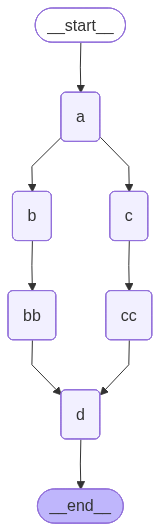

In [24]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
%%time
initial_state = State(nlist = ["Initial String:"])
graph.invoke(initial_state)

Adding 'A' to ['Initial String:']
Adding 'B' to ['Initial String:', 'A']
Adding 'C' to ['Initial String:', 'A']
Adding 'BB' to ['Initial String:', 'A', 'B', 'C']
Adding 'CC' to ['Initial String:', 'A', 'B', 'C']
Adding 'D' to ['Initial String:', 'A', 'B', 'C', 'BB', 'CC']
CPU times: user 5.12 ms, sys: 0 ns, total: 5.12 ms
Wall time: 7.29 ms


{'nlist': ['Initial String:', 'A', 'B', 'C', 'BB', 'CC', 'D']}